In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
import cv2
import tifffile

In [65]:
img=tifffile.imread('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Test-Track1/OMA_289_008_RGB.tif')

### Filp

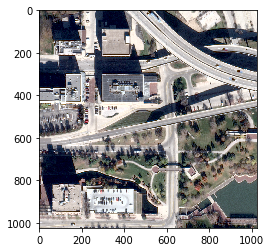

In [76]:
plt.imshow(img)

In [5]:
img_ul=np.fliplr(np.flipud(img))

In [12]:
img_u=np.concatenate((img_ul,np.flipud(img)),axis=1)
img_d=np.concatenate((np.fliplr(img),img),axis=1)
img_4=np.concatenate((img_u,img_d),axis=0)

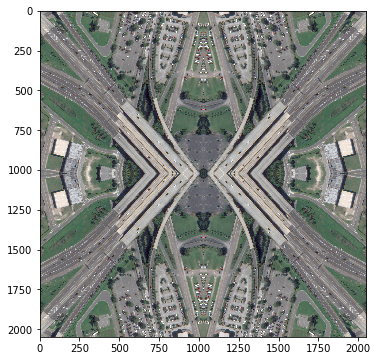

In [16]:
plt.figure(1,figsize=(6,6))
plt.imshow(img_4)

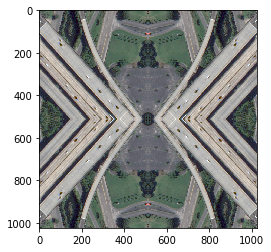

In [18]:
plt.imshow(img_4[512:1536,512:1536,:])

In [19]:
img_4[512:1536,512:1536,:].shape

(1024, 1024, 3)

In [21]:
image=img_4[512:1536,512:1536,:]

In [23]:
tifffile.imsave('/data/DW/DataFusion/dfc2019-master/TRACK1_DEEPLAB/JAX_160_001_RGB_FILP.tif',image)

### Bright

In [32]:
img_new=np.minimum(img+20,255)

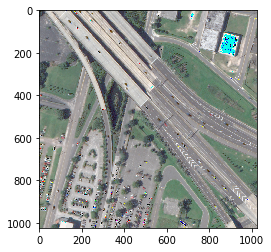

In [33]:
plt.imshow(img_new)

In [35]:
tifffile.imsave('/data/DW/DataFusion/TRACK1/V2-deeplabv3/V2-deeplabv3_DSM/test_flip/JAX_160_001_RGB.tif',img_new)

### Classification

In [36]:
img_cls=tifffile.imread('/data/DW/DataFusion/TRACK1/V2-deeplabv3/V2-deeplabv3_DSM/test_flip/JAX_160_001_BRIDGE.tif')

In [51]:
bridge=img.copy()
bridge[img_cls!=17]=255

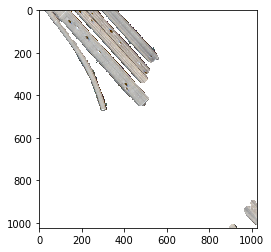

In [52]:
plt.imshow(bridge)

In [53]:
tifffile.imsave('/data/DW/DataFusion/TRACK1/V2-deeplabv3/V2-deeplabv3_DSM/test_flip/JAX_160_001_RGB.tif',bridge)

### Hist Eq

In [70]:
#https://www.cnblogs.com/wangyong/p/9119394.html
import numpy as np
import cv2


def hisEqulColor(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    print(len(channels))
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

eq = hisEqulColor(img)

3


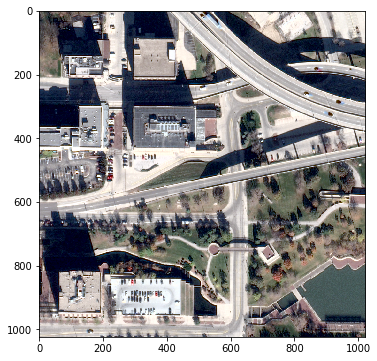

In [71]:
plt.figure(1,figsize=(6,6))
plt.imshow(eq)

In [72]:
tifffile.imsave('/data/DW/DataFusion/TRACK1/V2-deeplabv3/V2-deeplabv3_DSM/test_flip/OMA_289_008_RGB.tif',eq)

### White Balance

In [73]:
# https://www.cnblogs.com/wangyong/p/9119394.html
def whiteBalance(img):
    
    rows=img.shape[0]
    cols=img.shape[1]
    
    final=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    avg_a=np.average(final[:,:,1])
    avg_b=np.average(final[:,:,2])
    
    for x in range(final.shape[0]):
        for y in range(final.shape[1]):
            l,a,b=final[x,y,:]
            l*=100/255
            final[x,y,1]=a-((avg_a-128)*(l/100)*1.1)
            final[x,y,2]=b-((avg_b-128)*(l/100)*1.1)
            
    final=cv2.cvtColor(final,cv2.COLOR_LAB2BGR)
    
    return final

In [74]:
img_WB=whiteBalance(img)

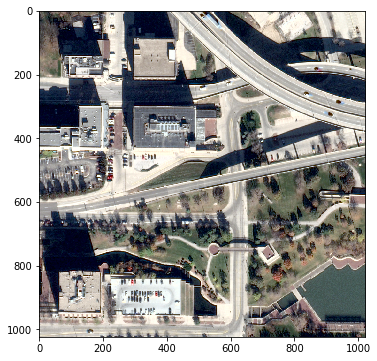

In [75]:
plt.figure(1,figsize=(6,6))
plt.imshow(img_WB)

In [77]:
tifffile.imsave('/data/DW/DataFusion/TRACK1/V2-deeplabv3/V2-deeplabv3_DSM/test_flip/OMA_289_008_RGB.tif',img_WB)